In [32]:
# Snippet 1: Data Prep (unchanged)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('E:\Semisters\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 6\housing.csv')
df.head()

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\FAIZ SIDDIQUI\AppData\Local\Temp\ipykernel_3280\3210933993.py:6: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('E:\Semisters\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 6\housing.csv')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
df = df.dropna()

In [35]:
df.shape

(20433, 10)

Text(0.5, 1.0, 'Distribution of Ocean Proximity')

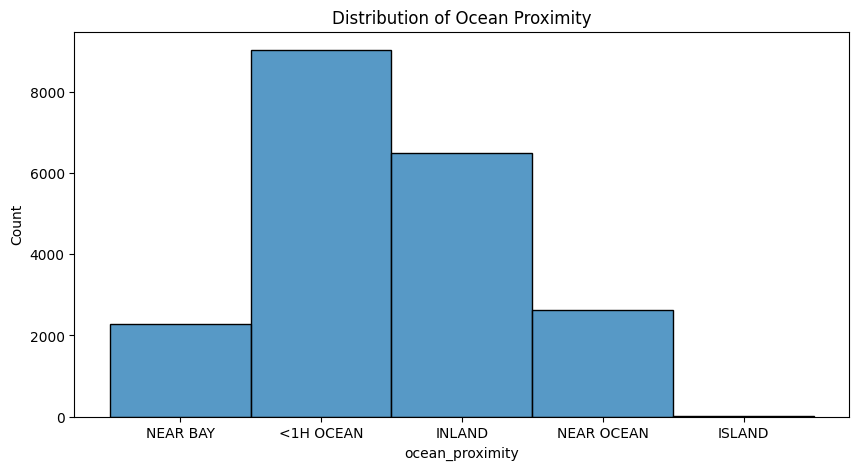

In [36]:
# EDA
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ocean_proximity')

plt.title('Distribution of Ocean Proximity')

In [37]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [38]:
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [39]:
X = df.drop("ocean_proximity", axis=1).values
y = df["ocean_proximity"].values

In [40]:
np.random.seed(42)
indices = np.random.permutation(len(X))
n_train = int(0.6 * len(X))
n_val = int(0.2 * len(X))
train_idx, val_idx, test_idx = indices[:n_train], indices[n_train:n_train+n_val], indices[n_train+n_val:]
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [41]:

X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_std[X_std == 0] = 1.0
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [42]:

class NeuralNetwork:
    def __init__(self, input_size=13, hidden_size=20):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X, training=False):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)
        return A2, A1

    def backward(self, X, y, output, A1, learning_rate):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        dZ2 = output - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_true = y_true.reshape(-1, 1)
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

Epoch 0: Train Loss = 0.7037, Val Loss = 0.7038, Train Acc = 0.4424, Val Acc = 0.4447
Epoch 20: Train Loss = -0.6475, Val Loss = -0.6767, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 40: Train Loss = -1.2663, Val Loss = -1.3222, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 60: Train Loss = -2.1526, Val Loss = -2.2484, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 80: Train Loss = -3.2995, Val Loss = -3.4516, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 100: Train Loss = -3.3247, Val Loss = -3.5368, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 120: Train Loss = -3.0154, Val Loss = -3.2550, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 140: Train Loss = -2.8127, Val Loss = -3.0552, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 160: Train Loss = -2.7373, Val Loss = -2.9739, Train Acc = 0.3173, Val Acc = 0.3118
Epoch 180: Train Loss = -2.7772, Val Loss = -3.0063, Train Acc = 0.3173, Val Acc = 0.3118


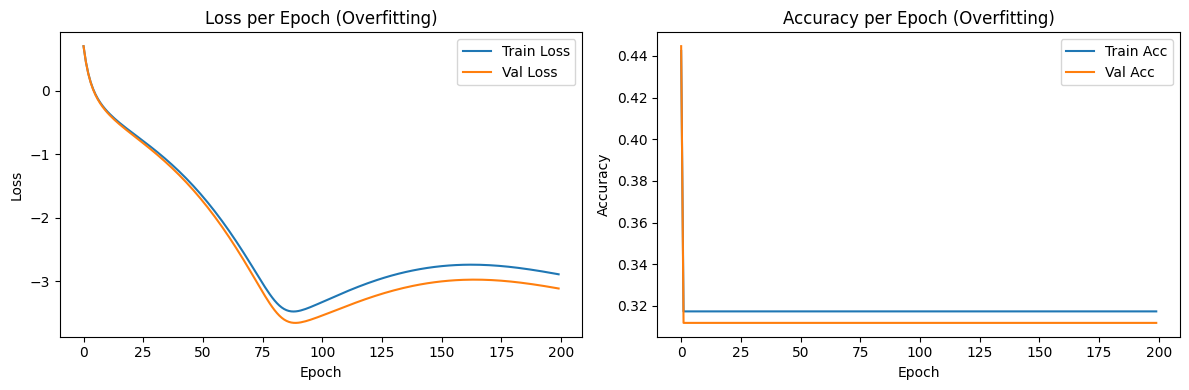

In [43]:
# Snippet 3: Overfitting Demo
nn = NeuralNetwork(input_size=9, hidden_size=20)
epochs = 200
learning_rate = 0.1
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for epoch in range(epochs):
    train_output, train_A1 = nn.forward(X_train)
    val_output, _ = nn.forward(X_val)
    train_loss = nn.compute_loss(y_train, train_output)
    val_loss = nn.compute_loss(y_val, val_output)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_pred = (train_output >= 0.5).astype(int)
    val_pred = (val_output >= 0.5).astype(int)
    train_acc = np.mean(train_pred == y_train.reshape(-1, 1))
    val_acc = np.mean(val_pred == y_val.reshape(-1, 1))
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    nn.backward(X_train, y_train, train_output, train_A1, learning_rate)
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, "
              f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch (Overfitting)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.title("Accuracy per Epoch (Overfitting)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

L1 - Epoch 0: Train Loss = 0.6956, Val Loss = 0.6956, Train Acc = 0.4424, Val Acc = 0.4442
L1 - Epoch 20: Train Loss = -1.2471, Val Loss = -1.3018, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 40: Train Loss = -3.2240, Val Loss = -3.3705, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 60: Train Loss = -2.9503, Val Loss = -3.1865, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 80: Train Loss = -2.6181, Val Loss = -2.8558, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 100: Train Loss = -2.7289, Val Loss = -2.9536, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 120: Train Loss = -2.9863, Val Loss = -3.2054, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 140: Train Loss = -3.1619, Val Loss = -3.3825, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 160: Train Loss = -3.2303, Val Loss = -3.4556, Train Acc = 0.3173, Val Acc = 0.3118
L1 - Epoch 180: Train Loss = -3.2246, Val Loss = -3.4556, Train Acc = 0.3173, Val Acc = 0.3118


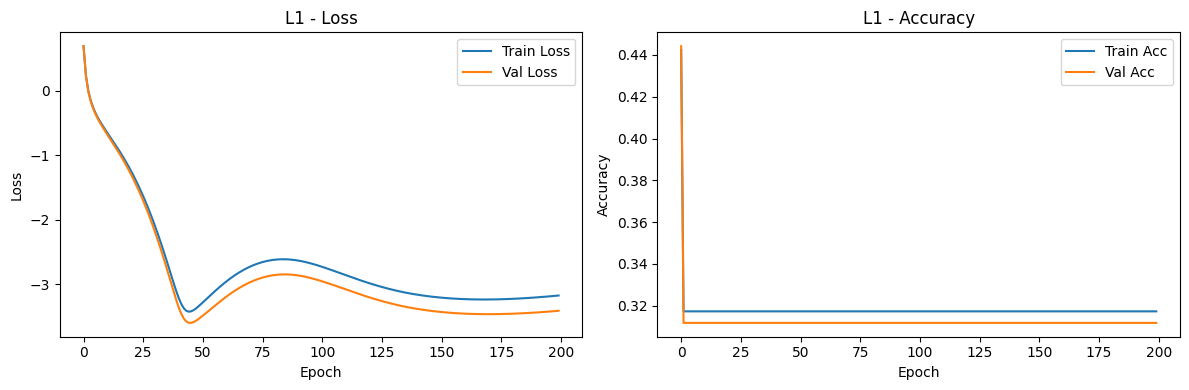

L2 - Epoch 0: Train Loss = 0.6655, Val Loss = 0.6652, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 20: Train Loss = -1.2921, Val Loss = -1.3488, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 40: Train Loss = -3.3162, Val Loss = -3.4689, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 60: Train Loss = -3.0153, Val Loss = -3.2539, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 80: Train Loss = -2.7378, Val Loss = -2.9737, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 100: Train Loss = -2.8903, Val Loss = -3.1130, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 120: Train Loss = -3.1709, Val Loss = -3.3884, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 140: Train Loss = -3.3694, Val Loss = -3.5885, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 160: Train Loss = -3.4656, Val Loss = -3.6902, Train Acc = 0.3173, Val Acc = 0.3118
L2 - Epoch 180: Train Loss = -3.4880, Val Loss = -3.7192, Train Acc = 0.3173, Val Acc = 0.3118


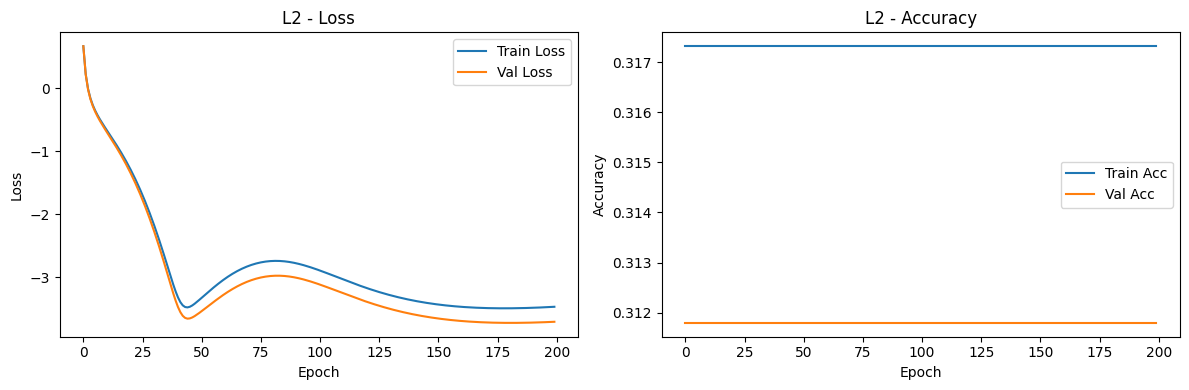

Dropout - Epoch 0: Train Loss = 0.6923, Val Loss = 0.6923, Train Acc = 0.3747, Val Acc = 0.3118
Dropout - Epoch 20: Train Loss = -1.2184, Val Loss = -1.2575, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 40: Train Loss = -2.6348, Val Loss = -2.7466, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 60: Train Loss = -3.2531, Val Loss = -3.4875, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 80: Train Loss = -3.0660, Val Loss = -3.1775, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 100: Train Loss = -2.9563, Val Loss = -3.0734, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 120: Train Loss = -2.9126, Val Loss = -3.0626, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 140: Train Loss = -2.9712, Val Loss = -3.1670, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 160: Train Loss = -3.0839, Val Loss = -3.3027, Train Acc = 0.3173, Val Acc = 0.3118
Dropout - Epoch 180: Train Loss = -3.1754, Val Loss = -3.3951, Train Acc = 0.3173, Val Acc = 0.3118


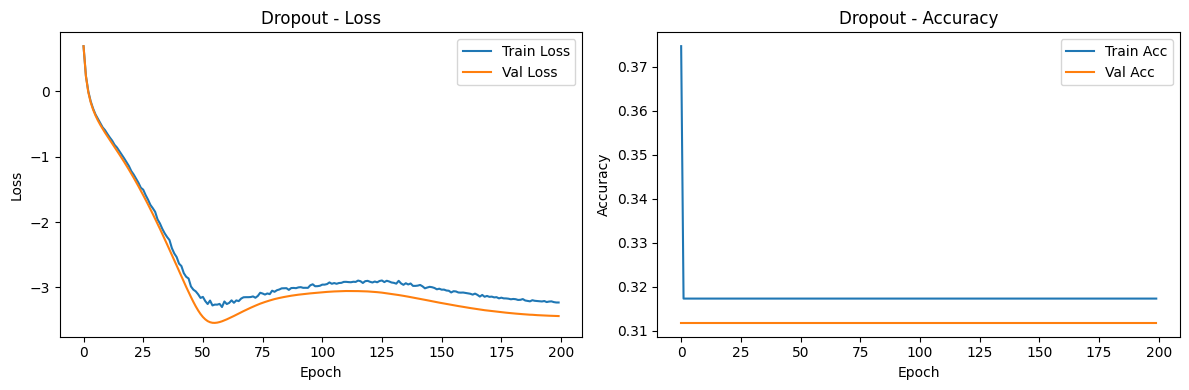

L2 + Dropout - Epoch 0: Train Loss = 0.6863, Val Loss = 0.6858, Train Acc = 0.3455, Val Acc = 0.3118
L2 + Dropout - Epoch 20: Train Loss = -1.2082, Val Loss = -1.2551, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 40: Train Loss = -2.6175, Val Loss = -2.7262, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 60: Train Loss = -3.2471, Val Loss = -3.4929, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 80: Train Loss = -3.0612, Val Loss = -3.1833, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 100: Train Loss = -2.9534, Val Loss = -3.0747, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 120: Train Loss = -2.8930, Val Loss = -3.0625, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 140: Train Loss = -2.9801, Val Loss = -3.1648, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 160: Train Loss = -3.0841, Val Loss = -3.3014, Train Acc = 0.3173, Val Acc = 0.3118
L2 + Dropout - Epoch 180: Train Loss = -3.1842, Val Loss = -3.3

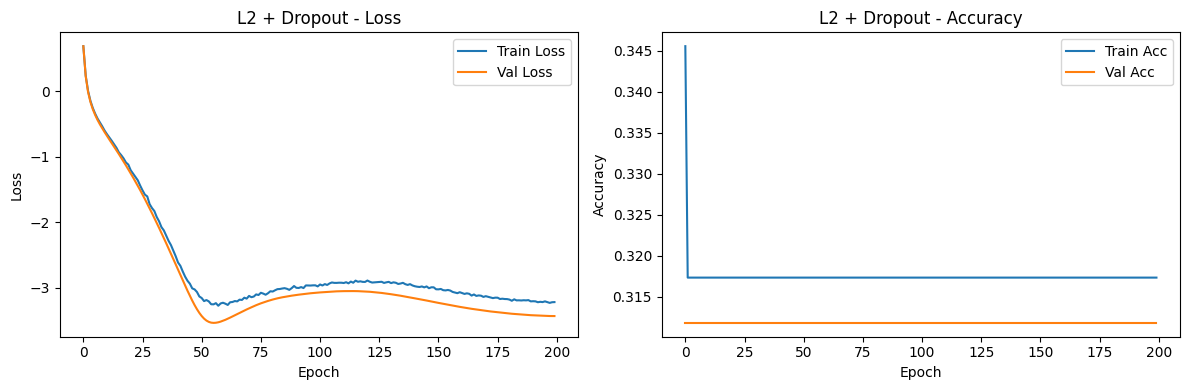

L1 + L2 - Epoch 0: Train Loss = 0.6880, Val Loss = 0.6879, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 20: Train Loss = -1.2487, Val Loss = -1.3033, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 40: Train Loss = -3.2162, Val Loss = -3.3620, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 60: Train Loss = -2.9553, Val Loss = -3.1906, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 80: Train Loss = -2.6199, Val Loss = -2.8574, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 100: Train Loss = -2.7225, Val Loss = -2.9470, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 120: Train Loss = -2.9756, Val Loss = -3.1944, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 140: Train Loss = -3.1509, Val Loss = -3.3710, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 160: Train Loss = -3.2197, Val Loss = -3.4441, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 - Epoch 180: Train Loss = -3.2148, Val Loss = -3.4448, Train Acc = 0.3173, Val Acc = 0.3118


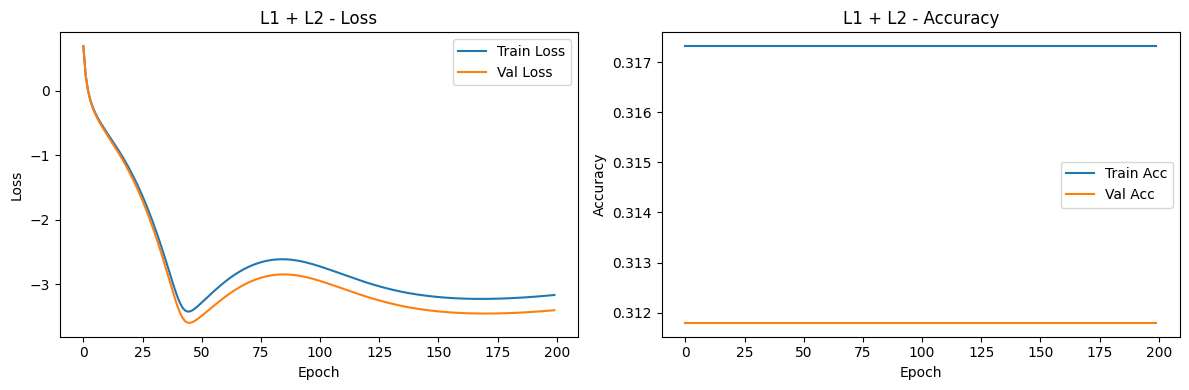

L1 + L2 + Dropout - Epoch 0: Train Loss = 0.7139, Val Loss = 0.7139, Train Acc = 0.4341, Val Acc = 0.4447
L1 + L2 + Dropout - Epoch 20: Train Loss = -1.1915, Val Loss = -1.2251, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 40: Train Loss = -2.5058, Val Loss = -2.6536, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 60: Train Loss = -3.2003, Val Loss = -3.4515, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 80: Train Loss = -2.9930, Val Loss = -3.1229, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 100: Train Loss = -2.8761, Val Loss = -2.9900, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 120: Train Loss = -2.8058, Val Loss = -2.9424, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 140: Train Loss = -2.8134, Val Loss = -3.0132, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout - Epoch 160: Train Loss = -2.9351, Val Loss = -3.1359, Train Acc = 0.3173, Val Acc = 0.3118
L1 + L2 + Dropout 

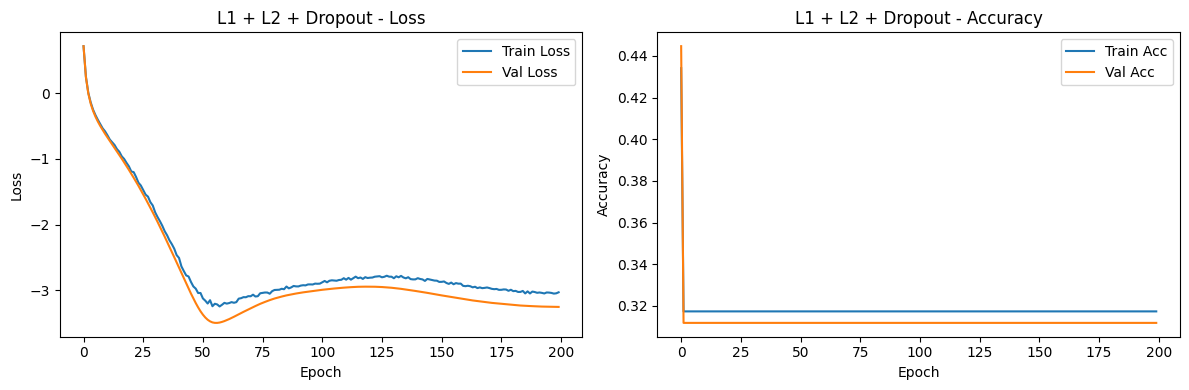

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Snippet 4: RegularizedNeuralNetwork
class RegularizedNeuralNetwork:
    def __init__(self, input_size=9, hidden_size=20, l1_lambda=0.0, l2_lambda=0.0, dropout_rate=0.0):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X, training=False):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        if training and self.dropout_rate > 0:
            self.dropout_mask = (np.random.rand(*A1.shape) > self.dropout_rate).astype(int)
            A1 *= self.dropout_mask / (1 - self.dropout_rate)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)
        return A2, A1

    def backward(self, X, y, output, A1, learning_rate):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        dZ2 = output - y
        dW2 = np.dot(A1.T, dZ2) / m + self.l1_lambda * np.sign(self.W2) + self.l2_lambda * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(A1)
        if self.dropout_rate > 0:
            dZ1 *= self.dropout_mask / (1 - self.dropout_rate)
        dW1 = np.dot(X.T, dZ1) / m + self.l1_lambda * np.sign(self.W1) + self.l2_lambda * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_true = y_true.reshape(-1, 1)
        base_loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
        l1_reg = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
        l2_reg = self.l2_lambda * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return base_loss + l1_reg + l2_reg / (2 * m)

def train_model(nn, X_train, y_train, X_val, y_val, epochs, learning_rate, title):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(epochs):
        train_output, train_A1 = nn.forward(X_train, training=True)
        val_output, _ = nn.forward(X_val, training=False)
        train_loss = nn.compute_loss(y_train, train_output)
        val_loss = nn.compute_loss(y_val, val_output)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_pred = (train_output >= 0.5).astype(int)
        val_pred = (val_output >= 0.5).astype(int)
        train_acc = np.mean(train_pred == y_train.reshape(-1, 1))
        val_acc = np.mean(val_pred == y_val.reshape(-1, 1))
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        nn.backward(X_train, y_train, train_output, train_A1, learning_rate)
        if epoch % 20 == 0:
            print(f"{title} - Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, "
                  f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return nn

# Train with different regularizations, including L1+L2 and L1+L2+Dropout
nn_l1 = train_model(RegularizedNeuralNetwork(l1_lambda=0.001), X_train, y_train, X_val, y_val, 200, 0.2, "L1")
nn_l2 = train_model(RegularizedNeuralNetwork(l2_lambda=0.001), X_train, y_train, X_val, y_val, 200, 0.2, "L2")
nn_dropout = train_model(RegularizedNeuralNetwork(dropout_rate=0.3), X_train, y_train, X_val, y_val, 200, 0.2, "Dropout")
nn_l2_dropout = train_model(RegularizedNeuralNetwork(l2_lambda=0.001, dropout_rate=0.3), X_train, y_train, X_val, y_val, 200, 0.2, "L2 + Dropout")
nn_l1_l2 = train_model(RegularizedNeuralNetwork(l1_lambda=0.001, l2_lambda=0.001), X_train, y_train, X_val, y_val, 200, 0.2, "L1 + L2")
nn_l1_l2_dropout = train_model(RegularizedNeuralNetwork(l1_lambda=0.001, l2_lambda=0.001, dropout_rate=0.3), X_train, y_train, X_val, y_val, 200, 0.2, "L1 + L2 + Dropout")

No Regularization - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
No Regularization - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1304


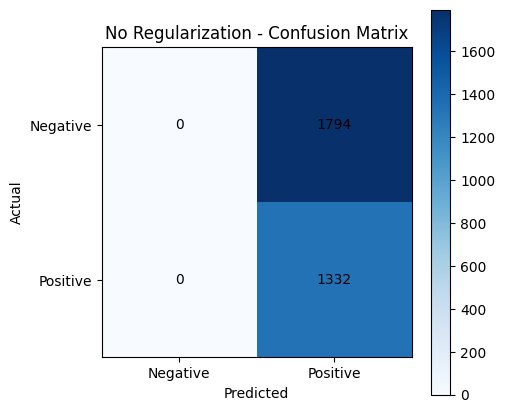

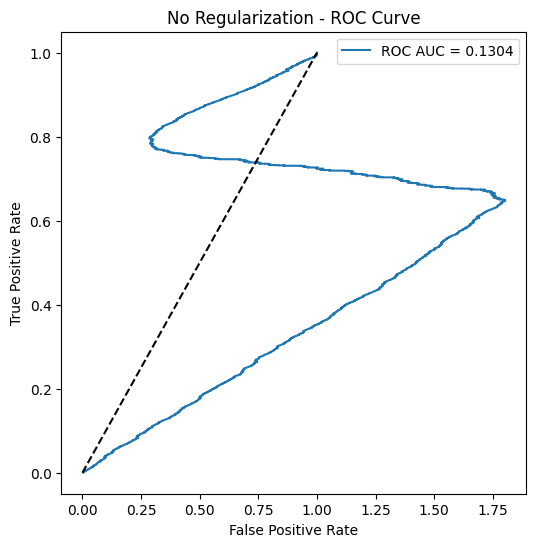

L1 Regularization - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
L1 Regularization - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1617


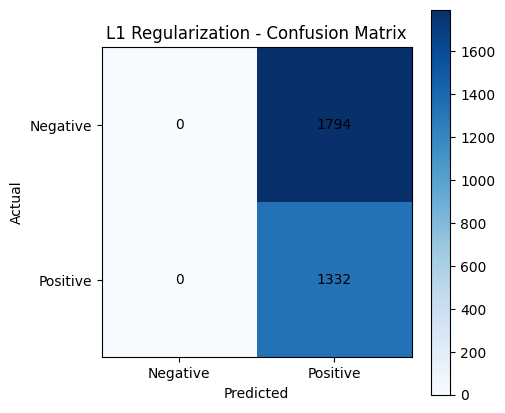

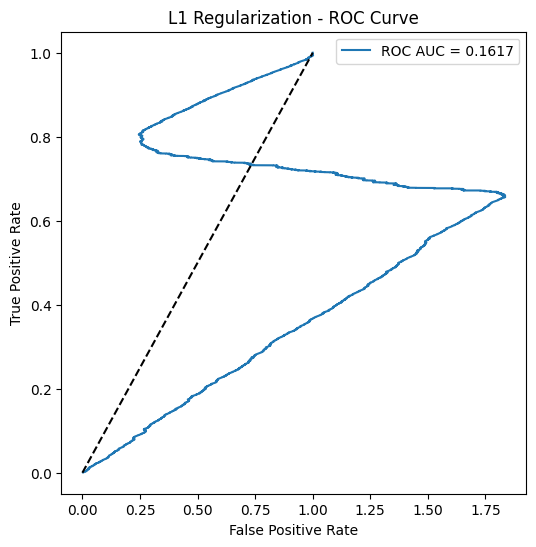

L2 Regularization - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
L2 Regularization - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1576


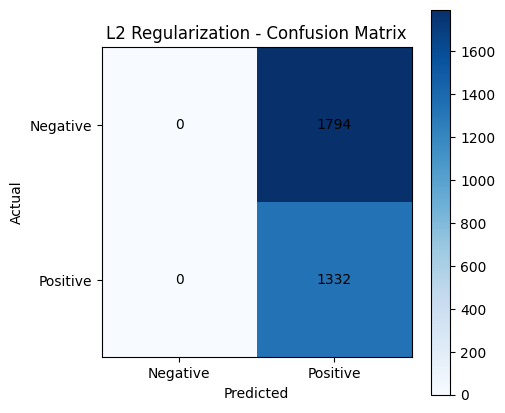

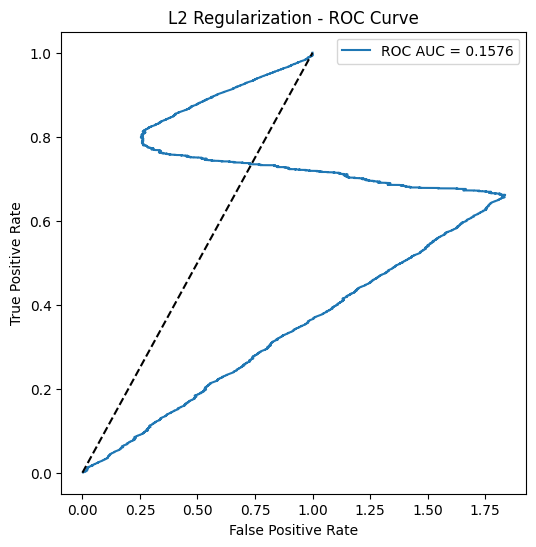

Dropout - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
Dropout - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.0980


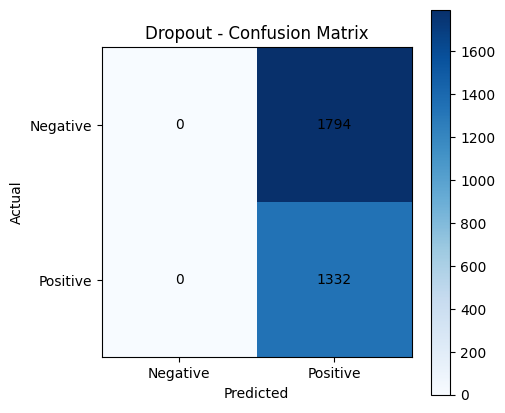

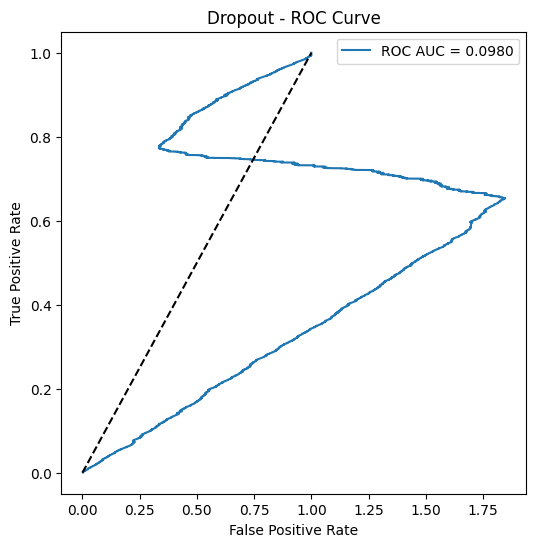

L2 + Dropout - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
L2 + Dropout - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1000


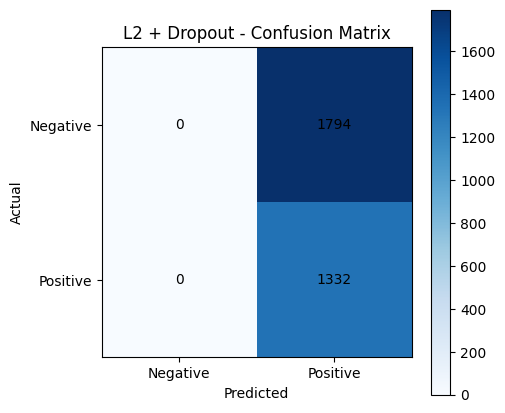

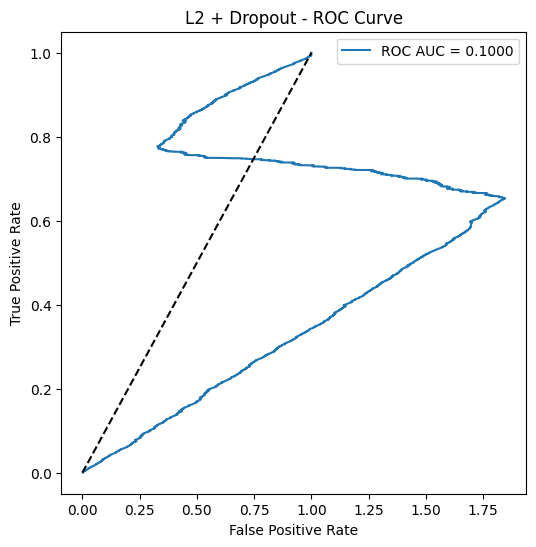

L1 + L2 - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
L1 + L2 - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1596


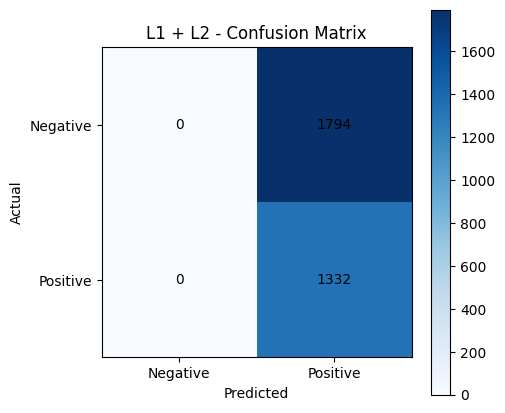

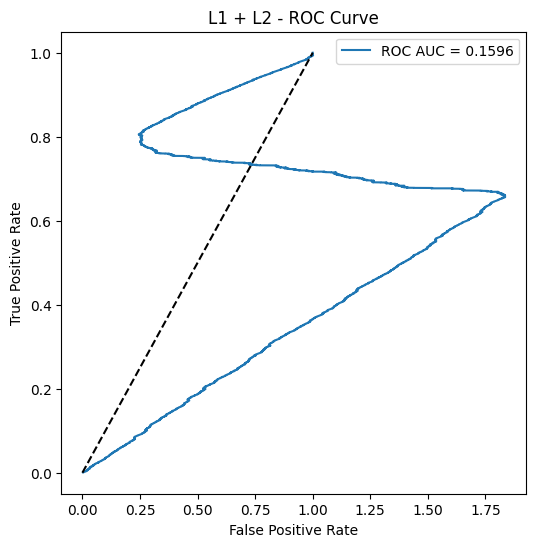

L1 + L2 + Dropout - Confusion Matrix: TP=1332, TN=0, FP=1794, FN=0
L1 + L2 + Dropout - Precision: 0.4261, Recall: 1.0000, F1: 0.5976, Accuracy: 0.3258, ROC AUC: 0.1006


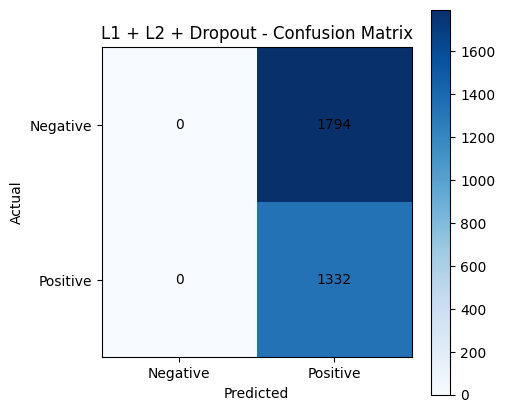

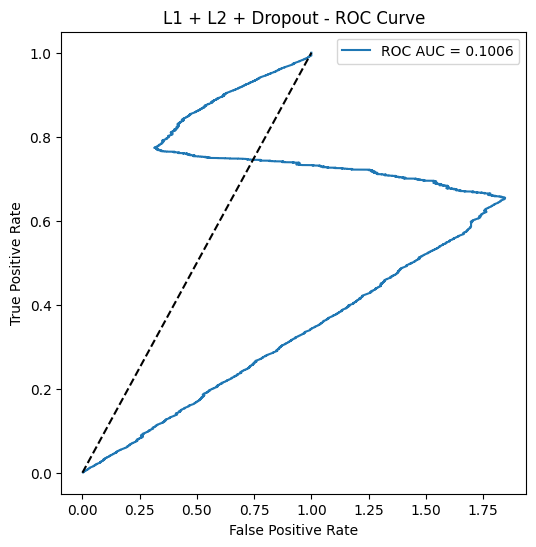

In [45]:
# Snippet 5: Evaluation
def evaluate_model(nn, X_test, y_test, title):
    y_pred_proba, _ = nn.forward(X_test, training=False)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    y_test = y_test.reshape(-1, 1)
    tp = np.sum((y_test == 1) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    cm = np.array([[tn, fp], [fn, tp]])
    print(f"{title} - Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / len(y_test)
    sorted_idx = np.argsort(y_pred_proba.flatten())[::-1]
    y_test_sorted = y_test.flatten()[sorted_idx]
    tpr = np.cumsum(y_test_sorted) / np.sum(y_test)
    fpr = np.cumsum(1 - y_test_sorted) / np.sum(1 - y_test)
    auc = np.sum(np.diff(fpr) * tpr[:-1])
    print(f"{title} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
          f"Accuracy: {accuracy:.4f}, ROC AUC: {auc:.4f}")
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.title(f"{title} - Confusion Matrix")
    plt.colorbar()
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.yticks([0, 1], ["Negative", "Positive"])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.title(f"{title} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Evaluate all models
evaluate_model(nn, X_test, y_test, "No Regularization")
evaluate_model(nn_l1, X_test, y_test, "L1 Regularization")
evaluate_model(nn_l2, X_test, y_test, "L2 Regularization")
evaluate_model(nn_dropout, X_test, y_test, "Dropout")
evaluate_model(nn_l2_dropout, X_test, y_test, "L2 + Dropout")
evaluate_model(nn_l1_l2, X_test, y_test, "L1 + L2")
evaluate_model(nn_l1_l2_dropout, X_test, y_test, "L1 + L2 + Dropout")